# Imports

# Cas de tests, Modele linéaire

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

[-0.33333278  1.3333335 ]


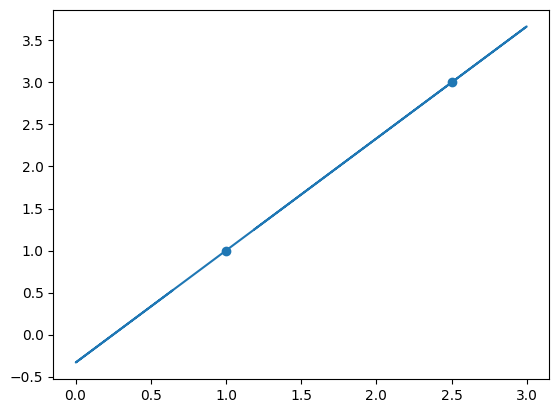

<Figure size 640x480 with 0 Axes>

In [5]:
rust_machine_learning_library = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")
X = np.array([
      [1],
      [2.5]
])
Y = np.array([
      [1],
      [3]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

dimensions_of_inputs = len(X[0])
number_of_inputs = len(X)
number_of_classes = len(Y[0])
X_flat = X.flatten()
Y_flat = Y.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

rust_machine_learning_library.train_linear_model_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.train_linear_model_regression.restype = ctypes.POINTER(ctypes.c_float)

rust_machine_learning_library.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]
rust_machine_learning_library.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)

find_w_linear_regression_ptr = rust_machine_learning_library.train_linear_model_regression(
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    y_to_predict_ptr,
    number_of_classes,
)


X_to_predict = []

for i in range(1000) :
    x_1 = random.uniform(0,3)
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

x_to_predict = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

number_of_inputs = len(X_to_predict)
dimensions_of_inputs = len(X_to_predict[0])

predicted_outputs = rust_machine_learning_library.predict_with_linear_model(
    find_w_linear_regression_ptr,
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    number_of_classes,
    False,
)


x = X_to_predict_flat
y = np.ctypeslib.as_array(
    predicted_outputs, ((number_of_inputs * number_of_classes),)
)


plt.plot(x, y)
plt.scatter(X,Y)
plt.show()
plt.clf()

In [6]:
rust_machine_learning_library.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.delete_float_array.restype = None

rust_machine_learning_library.delete_float_array(find_w_linear_regression_ptr, ((dimensions_of_inputs + 1) * number_of_classes))
del find_w_linear_regression_ptr

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

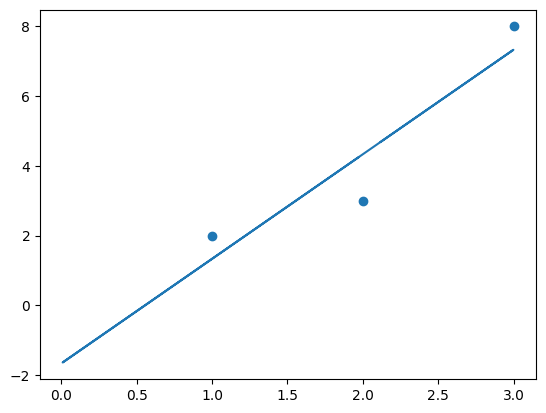

<Figure size 640x480 with 0 Axes>

In [11]:
rust_machine_learning_library = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      [2],
      [3],
      [8]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

dimensions_of_inputs = len(X[0])
number_of_inputs = len(X)
number_of_classes = len(Y[0])

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

rust_machine_learning_library.train_linear_model_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.train_linear_model_regression.restype = ctypes.POINTER(ctypes.c_float)

rust_machine_learning_library.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]
rust_machine_learning_library.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)

find_w_linear_regression_ptr = rust_machine_learning_library.train_linear_model_regression(
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    y_to_predict_ptr,
    number_of_classes,
)

X_to_predict = []

for i in range(1000) :
    x_1 = random.uniform(0,3)
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

x_to_predict = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

number_of_inputs = len(X_to_predict)
dimensions_of_inputs = len(X_to_predict[0])

predicted_outputs = rust_machine_learning_library.predict_with_linear_model(
    find_w_linear_regression_ptr,
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    number_of_classes,
    False,
)


x = X_to_predict_flat
y = np.ctypeslib.as_array(
    predicted_outputs, ((number_of_inputs * number_of_classes),)
)


plt.plot(x, y)
plt.scatter(X,Y)
plt.show()
plt.clf()



In [12]:
rust_machine_learning_library.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.delete_float_array.restype = None

rust_machine_learning_library.delete_float_array(find_w_linear_regression_ptr, ((dimensions_of_inputs + 1) * number_of_classes))
del find_w_linear_regression_ptr

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

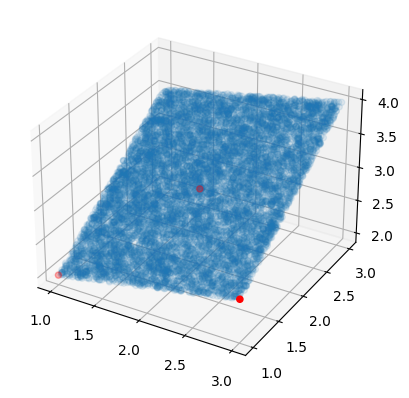

<Figure size 640x480 with 0 Axes>

In [25]:
rust_machine_learning_library = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      [2],
      [3],
      [2.5]
])

Y_line = np.array([2, 3, 2.5])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

dimensions_of_inputs = len(X[0])
number_of_inputs = len(X)
number_of_classes = len(Y[0])

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)


rust_machine_learning_library.train_linear_model_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.train_linear_model_regression.restype = ctypes.POINTER(ctypes.c_float)

rust_machine_learning_library.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]
rust_machine_learning_library.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)

find_w_linear_regression_ptr = rust_machine_learning_library.train_linear_model_regression(
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    y_to_predict_ptr,
    number_of_classes,
)

X_to_predict = []

for i in range(10000) :
    x_1 = random.uniform(1,3)
    x_2 = random.uniform(1,3)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

x_to_predict = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

number_of_inputs = len(X_to_predict)
dimensions_of_inputs = len(X_to_predict[0])

predicted_outputs = rust_machine_learning_library.predict_with_linear_model(
    find_w_linear_regression_ptr,
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    number_of_classes,
    False,
)


x = X_to_predict_flat
y = np.ctypeslib.as_array(predicted_outputs, (number_of_inputs, number_of_classes))


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_to_predict[:,0],X_to_predict[:,1],y, alpha = 0.1)
ax.scatter(X[:,0],X[:,1],Y_line,c='r')
plt.show()
plt.clf()

In [21]:
rust_machine_learning_library.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.delete_float_array.restype = None

rust_machine_learning_library.delete_float_array(find_w_linear_regression_ptr, ((dimensions_of_inputs + 1) * number_of_classes))
del find_w_linear_regression_ptr

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

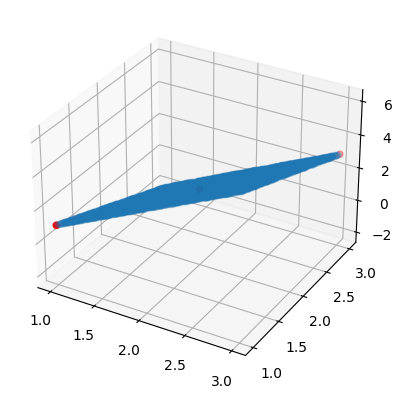

<Figure size 640x480 with 0 Axes>

In [31]:
rust_machine_learning_library = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      [1],
      [2],
      [3]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

dimensions_of_inputs = len(X[0])
number_of_inputs = len(X)
number_of_classes = len(Y[0])

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
rust_machine_learning_library.train_linear_model_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.train_linear_model_regression.restype = ctypes.POINTER(ctypes.c_float)

rust_machine_learning_library.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]
rust_machine_learning_library.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)

find_w_linear_regression_ptr = rust_machine_learning_library.train_linear_model_regression(
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    y_to_predict_ptr,
    number_of_classes,
)

X_to_predict = []

for i in range(10000) :
    x_1 = random.uniform(1,3)
    x_2 = random.uniform(1,3)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

x_to_predict = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

number_of_inputs = len(X_to_predict)
dimensions_of_inputs = len(X_to_predict[0])

predicted_outputs = rust_machine_learning_library.predict_with_linear_model(
    find_w_linear_regression_ptr,
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    number_of_classes,
    False,
)


x = X_to_predict_flat
y = np.ctypeslib.as_array(predicted_outputs, (number_of_inputs, number_of_classes))


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_to_predict[:,0],X_to_predict[:,1],y, alpha = 0.1)
ax.scatter(X[:,0],X[:,1],Y.flatten(),c='r')
plt.show()
plt.clf()

In [35]:
rust_machine_learning_library.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.delete_float_array.restype = None

rust_machine_learning_library.delete_float_array(find_w_linear_regression_ptr, ((dimensions_of_inputs + 1) * number_of_classes))
del find_w_linear_regression_ptr

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

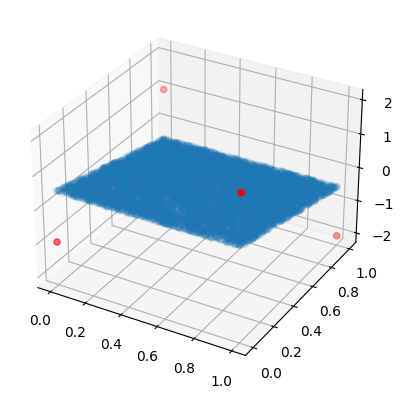

<Figure size 640x480 with 0 Axes>

In [37]:
rust_machine_learning_library = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      [2],
      [1],
      [-2],
      [-1]
])

X = np.array(X, dtype=ctypes.c_float)
Y = np.array(Y, dtype=ctypes.c_float)

dimensions_of_inputs = len(X[0])
number_of_inputs = len(X)
number_of_classes = len(Y[0])

X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
rust_machine_learning_library.train_linear_model_regression.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.train_linear_model_regression.restype = ctypes.POINTER(ctypes.c_float)

rust_machine_learning_library.predict_with_linear_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_bool,
]
rust_machine_learning_library.predict_with_linear_model.restype = ctypes.POINTER(ctypes.c_float)

find_w_linear_regression_ptr = rust_machine_learning_library.train_linear_model_regression(
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    y_to_predict_ptr,
    number_of_classes,
)

X_to_predict = []

for i in range(10000) :
    x_1 = random.uniform(0,1)
    x_2 = random.uniform(0,1)
    X_to_predict.append([x_1, x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

x_to_predict = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)

number_of_inputs = len(X_to_predict)
dimensions_of_inputs = len(X_to_predict[0])

predicted_outputs = rust_machine_learning_library.predict_with_linear_model(
    find_w_linear_regression_ptr,
    x_to_predict_ptr,
    number_of_inputs,
    dimensions_of_inputs,
    number_of_classes,
    False,
)


x = X_to_predict_flat
y = np.ctypeslib.as_array(predicted_outputs, (number_of_inputs, number_of_classes))


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_to_predict[:,0],X_to_predict[:,1],y, alpha = 0.1)
ax.scatter(X[:,0],X[:,1],Y.flatten(),c='r')
plt.show()
plt.clf()

In [38]:
rust_machine_learning_library.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]
rust_machine_learning_library.delete_float_array.restype = None

rust_machine_learning_library.delete_float_array(find_w_linear_regression_ptr, ((dimensions_of_inputs + 1) * number_of_classes))
del find_w_linear_regression_ptr